In [1]:
import pylaeoclim_leeds.hadcm3_processing as hcm3
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pylaeoclim_leeds.util_hadcm3 as util
import pylaeoclim_leeds.zones as zones

**** WARNING : Pylaeoclim_leeds on HadCM3 Branch ****


# Weighted mean and integrals

**GOAL**: update the *get* method from GeoDataArray to propose a weighted mean over the coordinates (both time and space).

**IDEA**: simply multiply the volume matric to the value along the remaining coordinates

In [2]:
ts = hcm3.MERIDATS('xoupb', 2000, 2100)
ts

__ Importation of <class 'pylaeoclim_leeds.hadcm3_processing.MERIDATS'> : xoupb between years 2000 and 2100.
Time elapsed for open_dataset : 11.438047170639038
Time elapsed for crop start year : 1.7808146476745605
Time elapsed for crop start and end years : 1.8381011486053467
Time elapsed for crop start and end years and months : 1.8381683826446533
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.


None; None
None; None
None; None
lat: [-88.75; -87.5; ...; 87.5; 88.75; 143]; lat_p: [-88.75; -87.5; ...; 88.75; 90.0; 144]
latb: [-89.375; -88.125; ...; 88.125; 89.375; 144]; latb_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 143]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-5500.099609375; -4884.7998046875; ...; -10.0; -0.0; 21]; z_p: [-5500.099609375; -4884.7998046875; ...; -10.0; -0.0; 21]
zb: [-5807.74951171875; -5192.44970703125; ...; -5.0; 5.0; 22]; zb_p: [-5807.74951171875; -5192.44970703125; ...; -5.0; 5.0; 22]
zs: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]; zs_p: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]
t: [2000-06-01 00:00:00; 2001-06-01 00:00:00; ...; 2099-06-01 00:00:00; 2100-06-01 00:00:00; 101]
DATA: <xarray.Dataset>
Dimensions:         (depth: 21, latitude: 143, t: 101)
Coordinates:
  * depth           (depth) float32 -0.0 -10.0 -20.0 ... -4884.8 -5500.0996
  * latitude        (latitude) float32 -88.75 -8

In [3]:
amoc = ts.atlantic()
amoc

__ Importing meridional Overturning Stream Function (Atlantic).
____ Coordinate imported in the GeoDataArray instance.


None; None
None; None
None; None
lat: [-88.75; -87.5; ...; 87.5; 88.75; 143]; lat_p: [-88.75; -87.5; ...; 88.75; 90.0; 144]
latb: [-89.375; -88.125; ...; 88.125; 89.375; 144]; latb_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 143]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-5500.099609375; -4884.7998046875; ...; -10.0; -0.0; 21]; z_p: [-5500.099609375; -4884.7998046875; ...; -10.0; -0.0; 21]
zb: [-5807.74951171875; -5192.44970703125; ...; -5.0; 5.0; 22]; zb_p: [-5807.74951171875; -5192.44970703125; ...; -5.0; 5.0; 22]
zs: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]; zs_p: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]
t: [2000-06-01 00:00:00; 2001-06-01 00:00:00; ...; 2099-06-01 00:00:00; 2100-06-01 00:00:00; 101]
DATA: <xarray.DataArray 'Merid_Atlantic' (t: 101, z: 21, latitude: 143)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [       

In [4]:
amoc_mean = ts.atlantic(mode_lat="mean", mode_z="mean")
amoc_mean

__ Importing meridional Overturning Stream Function (Atlantic).
____ Coordinate imported in the GeoDataArray instance.


None; None
None; None
None; None
None; None
None; None
None; None
None; None
None; None
None; None
t: [2000-06-01 00:00:00; 2001-06-01 00:00:00; ...; 2099-06-01 00:00:00; 2100-06-01 00:00:00; 101]
DATA: <xarray.DataArray 'Merid_Atlantic' (t: 101)>
array([4.410141 , 4.103878 , 4.2380023, 4.405623 , 4.418791 , 3.9882195,
       4.2376537, 4.1997967, 4.486809 , 4.552729 , 4.334927 , 4.3688955,
       4.6297565, 4.5334215, 4.3423247, 4.850699 , 4.429485 , 4.2127523,
       4.338864 , 4.247538 , 4.576664 , 4.58164  , 4.917033 , 4.8509455,
       4.6157575, 4.1612372, 4.502931 , 4.6978974, 4.727572 , 4.7466745,
       4.7082543, 4.640424 , 4.665263 , 4.2622495, 4.5378294, 4.943328 ,
       5.0673347, 4.7967095, 4.738744 , 4.8503733, 4.6750216, 4.751567 ,
       5.1949472, 5.069712 , 4.9679327, 4.696718 , 5.1114445, 5.152445 ,
       5.0793896, 4.868828 , 5.019577 , 4.950283 , 5.0382137, 5.126031 ,
       4.8783216, 5.105747 , 5.2939506, 5.3629265, 5.2386513, 5.1711392,
       5.0016894, 5.11

In [5]:
lat_weights = np.cos(np.deg2rad(ts.data.latitude))
lat_weights

<xarray.DataArray 'latitude' (latitude: 143)>
array([0.02181496, 0.04361945, 0.06540319, 0.0871558 , 0.10886693,
       0.13052624, 0.15212344, 0.17364822, 0.19509035, 0.21643965,
       0.23768592, 0.25881907, 0.27982903, 0.30070582, 0.32143947,
       0.34202015, 0.36243805, 0.38268343, 0.40274668, 0.42261824,
       0.44228867, 0.4617486 , 0.48098874, 0.49999997, 0.5187732 ,
       0.5372996 , 0.55557024, 0.57357645, 0.59130967, 0.6087614 ,
       0.62592345, 0.6427876 , 0.6593458 , 0.6755902 , 0.69151306,
       0.70710677, 0.72236395, 0.7372773 , 0.7518398 , 0.7660445 ,
       0.7798845 , 0.7933533 , 0.8064446 , 0.81915206, 0.8314696 ,
       0.8433914 , 0.85491186, 0.86602545, 0.87672675, 0.8870109 ,
       0.89687276, 0.9063078 , 0.91531146, 0.92387956, 0.93200785,
       0.9396926 , 0.9469301 , 0.953717  , 0.96004987, 0.9659258 ,
       0.9713421 , 0.976296  , 0.98078525, 0.9848077 , 0.98836154,
       0.9914449 , 0.99405634, 0.9961947 , 0.99785894, 0.99904823,
       0.999762  , 1.        , 0.999762  , 0.99904823, 0.99785894,
       0.9961947 , 0.99405634, 0.9914449 , 0.98836154, 0.9848077 ,
       0.98078525, 0.976296  , 0.9713421 , 0.9659258 , 0.96004987,
       0.953717  , 0.9469301 , 0.9396926 , 0.93200785, 0.92387956,
       0.91531146, 0.9063078 , 0.89687276, 0.8870109 , 0.87672675,
       0.86602545, 0.85491186, 0.8433914 , 0.8314696 , 0.81915206,
       0.8064446 , 0.7933533 , 0.7798845 , 0.7660445 , 0.7518398 ,
       0.7372773 , 0.72236395, 0.70710677, 0.69151306, 0.6755902 ,
       0.6593458 , 0.6427876 , 0.62592345, 0.6087614 , 0.59130967,
       0.57357645, 0.55557024, 0.5372996 , 0.5187732 , 0.49999997,
       0.48098874, 0.4617486 , 0.44228867, 0.42261824, 0.40274668,
       0.38268343, 0.36243805, 0.34202015, 0.32143947, 0.30070582,
       0.27982903, 0.25881907, 0.23768592, 0.21643965, 0.19509035,
       0.17364822, 0.15212344, 0.13052624, 0.10886693, 0.0871558 ,
       0.06540319, 0.04361945, 0.02181496], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -88.75 -87.5 -86.25 -85.0 ... 86.25 87.5 88.75

In [6]:
amoc_weights = amoc.data.weighted(lat_weights)
amoc_weights

DataArrayWeighted with weights along dimensions: latitude

In [7]:
weighted_mean = amoc_weights.mean(("latitude"))
weighted_mean

<xarray.DataArray (t: 101, z: 21)>
array([[-1.3465316 ,  3.9340081 ,  3.1002667 , ...,  1.4736515 ,
         0.8101102 ,  0.        ],
       [-1.4839709 ,  3.685575  ,  2.8709915 , ...,  1.3072295 ,
         0.72966015,  0.        ],
       [-0.8723826 ,  4.1878514 ,  3.3257413 , ...,  1.193232  ,
         0.66000026,  0.        ],
       ...,
       [-1.5614756 ,  2.988369  ,  1.925491  , ...,  1.3763604 ,
         0.77169985,  0.        ],
       [-1.8215705 ,  2.974483  ,  1.9427137 , ...,  1.1935499 ,
         0.66898984,  0.        ],
       [-1.5313075 ,  3.522521  ,  2.6652472 , ...,  1.255047  ,
         0.6870132 ,  0.        ]], dtype=float32)
Coordinates:
  * t        (t) object 2000-06-01 00:00:00 ... 2100-06-01 00:00:00
  * z        (z) float32 -5500.0996 -4884.8 -4269.5 -3654.3 ... -20.0 -10.0 -0.0

In [8]:
z_weights = xr.DataArray(amoc.zs, dims=["z"])
z_weights

<xarray.DataArray (z: 21)>
array([615.29980469, 615.29980469, 615.25      , 615.25      ,
       615.25      , 615.25      , 615.29992676, 505.29998779,
       329.24993896, 219.25006104, 146.04998779,  97.29998779,
        64.80001831,  43.1499939 ,  28.75      ,  19.15000153,
        12.75      ,  10.09999847,  10.        ,  10.        ,
        10.        ])
Dimensions without coordinates: z

In [9]:
amoc_weights_2 = weighted_mean.weighted(z_weights)
amoc_weights_2

DataArrayWeighted with weights along dimensions: z

In [10]:
weighted_mean_2 = amoc_weights_2.mean(("z"))
weighted_mean_2

<xarray.DataArray (t: 101)>
array([4.35294009, 3.89781818, 4.20195335, 4.52668633, 4.51000067,
       3.83418234, 4.41121251, 4.34771951, 4.87189609, 4.64539677,
       4.32696012, 4.37809819, 4.72579604, 4.5600973 , 4.44515451,
       5.36424046, 4.47202233, 4.19730996, 4.46788591, 4.1332826 ,
       4.78078387, 4.64160788, 5.3223459 , 5.12781094, 4.86019929,
       3.98914126, 4.54911305, 4.83231361, 4.89519409, 5.0387471 ,
       4.95441263, 4.78756643, 4.75449345, 4.00270401, 4.67412274,
       5.49087241, 5.69680533, 5.25143095, 5.12502546, 5.30860308,
       4.90362129, 4.89081947, 5.65106722, 5.53512899, 5.44640458,
       4.9756878 , 5.68863443, 5.88395537, 5.7800519 , 5.33138   ,
       5.43441509, 5.49229753, 5.61640869, 5.53656945, 4.99828279,
       5.37344945, 5.98382267, 6.13937541, 5.8106014 , 5.65617567,
       5.28425584, 5.70565344, 5.39030472, 5.72188137, 6.17926092,
       5.6875486 , 6.09981251, 6.14105741, 5.98381027, 5.87107425,
       5.55068185, 5.50119022, 5.53553839, 5.58283101, 5.86793749,
       5.8260433 , 5.98588883, 5.33688788, 6.10878603, 6.37880131,
       5.47763203, 6.16488387, 6.16393245, 6.27444501, 6.48361851,
       6.05520455, 6.5464754 , 6.18612284, 6.18089751, 6.03571311,
       6.12228353, 6.23268793, 6.31624813, 6.81763023, 7.16730057,
       6.5885218 , 5.92980873, 6.3626335 , 5.39723697, 5.60986805,
       6.34261368])
Coordinates:
  * t        (t) object 2000-06-01 00:00:00 ... 2100-06-01 00:00:00

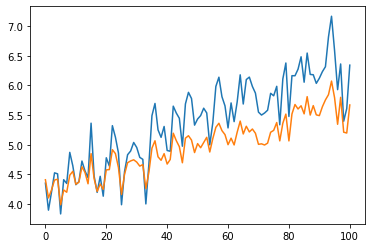

In [11]:

plt.plot(weighted_mean_2)
plt.plot(amoc_mean.values())

### Test

In [2]:
amoc_test = ts.atlantic(mode_lat="weighted_mean", mode_z="weighted_mean")
amoc_test

NameError: name 'ts' is not defined

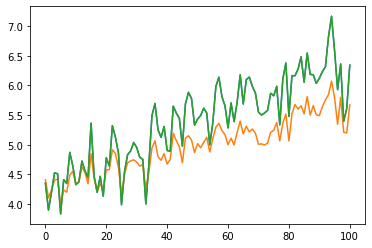

In [16]:
plt.plot(weighted_mean_2)
plt.plot(amoc_mean.values())
plt.plot(amoc_test.values())

## Integral

In [2]:
lon_na_min, lon_na_max, lat_na_min, lat_na_max = 310, 350, 45, 60

In [3]:
ts = hcm3.SALATS('xosfy')
salinity = ts.salinity(zone=zones.Box(lon_na_min, lon_na_max, lat_na_min, lat_na_max, z_min = -1000))
salinity.data

__ Importation of <class 'pylaeoclim_leeds.hadcm3_processing.SALATS'> : xosfy between years 101 and 199.
Time elapsed for open_dataset : 0.00555872917175293
Time elapsed for crop start year : 0.0012617111206054688
Time elapsed for crop start and end years : 0.002509593963623047
Time elapsed for crop start and end years and months : 0.0025420188903808594
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing sea water salinity (annual).
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


<xarray.DataArray 'salinity_ym_dpth' (t: 99, zb: 13, latitude: 12, longitude: 33)>
array([[[[      nan,       nan, 35.69317 , ..., 35.770752, 35.79606 ,
          35.823215],
         [      nan,       nan, 35.66066 , ..., 35.762318, 35.779953,
          35.81756 ],
         [      nan, 35.654736, 35.654182, ..., 35.78058 , 35.82275 ,
          35.858757],
         ...,
         [35.681137, 35.687355, 35.687805, ..., 35.693165, 35.724113,
                nan],
         [35.613552, 35.605755, 35.58135 , ..., 35.70048 , 35.727863,
          35.7443  ],
         [35.591812, 35.595695, 35.566254, ..., 35.70596 , 35.715424,
          35.70144 ]],

        [[      nan, 35.587044, 35.635155, ..., 35.884354, 35.9507  ,
          36.02766 ],
         [      nan,       nan, 35.592278, ..., 35.89723 , 35.97274 ,
          36.026325],
         [35.576027, 35.58261 , 35.594036, ..., 35.960697, 35.9902  ,
          36.004375],
         ...,
         [35.671963, 35.673645, 35.672554, ..., 35.748695, 35.740005,
          35.710976],
         [35.584602, 35.54158 , 35.54446 , ..., 35.7338  , 35.76202 ,
          35.748882],
         [35.55871 , 35.566402, 35.536667, ..., 35.713184, 35.691387,
          35.643837]],

        [[      nan, 35.49932 , 35.53576 , ..., 35.978416, 36.049255,
          36.04545 ],
         [      nan, 35.544594, 35.523678, ..., 35.97823 , 35.990623,
          36.014435],
         [35.486305, 35.487995, 35.49963 , ..., 35.957603, 35.957233,
          35.983612],
         ...,
         [35.618538, 35.62549 , 35.611694, ..., 35.719543, 35.694786,
          35.674164],
         [35.533546, 35.485878, 35.457035, ..., 35.737476, 35.720135,
          35.69403 ],
         [35.48506 , 35.442535, 35.41256 , ..., 35.700565, 35.676994,
          35.60942 ]],

        ...,

        [[33.648117, 33.524807, 33.896164, ..., 34.869198, 35.156605,
          35.46097 ],
         [33.968708, 33.901627, 33.894318, ..., 35.25309 , 35.33924 ,
          34.740307],
         [33.89926 , 34.143246, 34.123367, ..., 35.35186 , 35.222313,
          34.736156],
         ...,
         [34.918472, 34.97653 , 34.87479 , ..., 34.418262, 34.526493,
          34.765778],
         [34.84963 , 34.86688 , 34.894413, ..., 34.40141 , 34.45022 ,
          34.716896],
         [34.947132, 34.95448 , 35.020554, ..., 34.422527, 34.47426 ,
          34.610497]],

        [[33.22858 , 33.116146, 33.4321  , ..., 34.865913, 35.15208 ,
          35.427307],
         [33.727745, 33.613853, 33.532963, ..., 35.25077 , 35.33273 ,
          34.5877  ],
         [33.629074, 33.81476 , 33.770283, ..., 35.347893, 35.216225,
          34.7089  ],
         ...,
         [34.6172  , 34.69918 , 34.666294, ..., 34.38229 , 34.453964,
          34.659466],
         [34.564404, 34.58671 , 34.638   , ..., 34.3337  , 34.362263,
          34.609684],
         [34.689434, 34.706654, 34.82144 , ..., 34.301   , 34.300907,
          34.31186 ]],

        [[33.208595, 33.09407 , 33.411022, ..., 34.864223, 35.149643,
          35.424503],
         [33.713837, 33.5948  , 33.514744, ..., 35.249516, 35.33038 ,
          34.57601 ],
         [33.607586, 33.79375 , 33.75201 , ..., 35.345592, 35.21375 ,
          34.70287 ],
         ...,
         [34.602753, 34.68318 , 34.653423, ..., 34.377647, 34.44684 ,
          34.65284 ],
         [34.552353, 34.572773, 34.624702, ..., 34.327614, 34.35472 ,
          34.603134],
         [34.676083, 34.69542 , 34.812878, ..., 34.29069 , 34.286568,
          34.293564]]],


       [[[      nan,       nan, 35.68933 , ..., 35.77896 , 35.803543,
          35.83583 ],
         [      nan,       nan, 35.653934, ..., 35.76123 , 35.7766  ,
          35.81752 ],
         [      nan, 35.65097 , 35.648262, ..., 35.772446, 35.80971 ,
          35.84854 ],
         ...,
         [35.700806, 35.708862, 35.680058, ..., 35.71098 , 35.721733,
                nan],
         [35.60894 , 35.611202, 35.57854 , ..., 35.714516, 35.7212  ,
          35.69921 ],
         [35.56844 

In [4]:
matrix = util.volume_matrix(salinity.lon, salinity.lat, salinity.zb)*1000
salinity.data = salinity.data * np.resize(matrix, salinity.data.shape)
salinity.data

<xarray.DataArray 'salinity_ym_dpth' (t: 99, zb: 13, latitude: 12, longitude: 33)>
array([[[[           nan,            nan, 7.68705873e+17, ...,
          3.41850816e+17, 2.27815475e+17, 1.51851420e+17],
         [           nan,            nan, 4.80397775e+16, ...,
          4.21678142e+16, 4.21886083e+16, 1.39051985e+18],
         [           nan, 7.67878160e+17, 5.11525428e+17, ...,
          2.27716956e+17, 1.51849447e+17, 1.01264261e+17],
         ...,
         [4.20720932e+16, 4.20794248e+16, 1.38548254e+18, ...,
          7.68705791e+17, 5.12528718e+17,            nan],
         [2.26653956e+17, 1.50929623e+17, 1.00480866e+17, ...,
          4.80934227e+16, 4.23378214e+16, 4.21465704e+16],
         [4.19667689e+16, 1.38190663e+18, 1.15011215e+18, ...,
          5.12268263e+17, 3.41322058e+17, 2.27213290e+17]],

        [[           nan, 1.00496949e+17, 6.70185134e+16, ...,
          4.25232638e+16, 4.23899369e+16, 4.24806833e+16],
         [           nan,            nan, 7.49259936e+17, ...,
          3.35328992e+17, 2.23780978e+17, 1.49271155e+17],
         [9.82019352e+16, 6.54117234e+16, 4.68695179e+16, ...,
          4.14462434e+16, 4.14802467e+16, 1.36627504e+18],
         ...,
         [3.33224705e+17, 2.21920353e+17, 1.47805342e+17, ...,
          6.57170372e+16, 4.70617275e+16, 4.13642176e+16],
         [4.10127780e+16, 4.09631931e+16, 1.34882243e+18, ...,
          7.52239132e+17, 5.01510955e+17, 3.33943239e+17],
         [2.21205348e+17, 1.47365515e+17, 9.80932881e+16, ...,
          4.70264099e+16, 4.13415282e+16, 4.10810484e+16]],

        [[           nan, 1.34710950e+18, 1.12323157e+18, ...,
          5.04545603e+17, 3.36749132e+17, 2.24233285e+17],
         [           nan, 9.81151692e+16, 6.53033861e+16, ...,
          4.16737792e+16, 4.14807347e+16, 4.15081783e+16],
         [1.31493041e+18, 1.09532829e+18, 7.29725782e+17, ...,
          3.27989589e+17, 2.18421331e+17, 1.45586068e+17],
         ...,
         [4.02863869e+16, 4.00937823e+16, 4.00782582e+16, ...,
          1.10247497e+18, 7.33737385e+17, 4.88507590e+17],
         [3.24121525e+17, 2.15558094e+17, 1.43455590e+17, ...,
          6.41506101e+16, 4.59288393e+16, 4.03717732e+16],
         [3.99357428e+16, 3.98878827e+16, 1.31219779e+18, ...,
          7.33856183e+17, 4.88546350e+17, 3.24813618e+17]],

        ...,

        [[4.94476510e+16, 3.52895936e+16, 3.13863470e+16, ...,
          3.21267022e+16, 1.06649028e+18, 8.96027752e+17],
         [5.71640358e+17, 3.80054640e+17, 2.53107027e+17, ...,
          1.16767031e+17, 7.79806662e+16, 5.10526805e+16],
         [3.56837598e+16, 3.16151337e+16, 3.14395320e+16, ...,
          1.07241343e+18, 8.89997320e+17, 5.84555318e+17],
         ...,
         [1.15658694e+17, 7.71802927e+16, 5.12503107e+16, ...,
          3.18697871e+16, 3.18109515e+16, 3.20314161e+16],
         [1.02158280e+18, 8.51352350e+17, 5.67446855e+17, ...,
          2.48244128e+17, 1.65551907e+17, 1.11119270e+17],
         [7.45189467e+16, 4.96378747e+16, 3.56228630e+16, ...,
          3.06473119e+16, 3.06933695e+16, 1.01457288e+18]],

        [[8.11349661e+17, 5.38528989e+17, 3.62171759e+17, ...,
          1.67549547e+17, 1.12512177e+17, 7.55428401e+16],
         [4.78958240e+16, 3.41919694e+16, 3.00045826e+16, ...,
          3.13847193e+16, 1.03574443e+18, 8.44535583e+17],
         [5.46870135e+17, 3.66317134e+17, 2.43689854e+17, ...,
          1.13138918e+17, 7.50927418e+16, 4.92891352e+16],
         ...,
         [3.08206333e+16, 1.01717256e+18, 8.46454635e+17, ...,
          3.72465235e+17, 2.48623371e+17, 1.66557455e+17],
         [1.10631184e+17, 7.37504105e+16, 4.91884521e+16, ...,
          3.07210637e+16, 3.05936567e+16, 3.08139425e+16],
         [9.80971262e+17, 8.17509228e+17, 5.46260372e+17, ...,
          2.38777372e+17, 1.59012575e+17, 1.05944007e+17]],

        [[6.83107924e+16, 4.53361025e+16, 3.27853051e+16, ...,
          2.99442392e+16, 3.01893807e+16, 1.00175805e+18],
         [7.94123597e+17, 5.27017451e+17,

In [5]:
coordinates=['longitude', 'latitude', 'zb']
for coordinate in coordinates:
    salinity.data = salinity.data.sum(dim=coordinate, skipna=True)
salinity.data

<xarray.DataArray 'salinity_ym_dpth' (t: 99)>
array([1.61536196e+21, 1.61610190e+21, 1.61597937e+21, 1.61433420e+21,
       1.61619947e+21, 1.61801102e+21, 1.61826237e+21, 1.61561894e+21,
       1.61336385e+21, 1.61201041e+21, 1.61475416e+21, 1.61765186e+21,
       1.61690195e+21, 1.61457484e+21, 1.61242850e+21, 1.61127429e+21,
       1.60907191e+21, 1.61150371e+21, 1.61112855e+21, 1.60975553e+21,
       1.61167435e+21, 1.61116961e+21, 1.61100575e+21, 1.60797491e+21,
       1.60929973e+21, 1.61215053e+21, 1.60938722e+21, 1.60981976e+21,
       1.61168014e+21, 1.60995861e+21, 1.61009933e+21, 1.60954914e+21,
       1.61017312e+21, 1.60921196e+21, 1.61197726e+21, 1.61286484e+21,
       1.61397127e+21, 1.61482631e+21, 1.61168199e+21, 1.61019413e+21,
       1.61003537e+21, 1.61139788e+21, 1.61232460e+21, 1.60911644e+21,
       1.60615294e+21, 1.60815237e+21, 1.60794925e+21, 1.60772661e+21,
       1.61156423e+21, 1.61192433e+21, 1.61319652e+21, 1.60932360e+21,
       1.60668376e+21, 1.60744124e+21, 1.60631030e+21, 1.60438490e+21,
       1.60560215e+21, 1.60832674e+21, 1.60637173e+21, 1.60986319e+21,
       1.61112731e+21, 1.60898388e+21, 1.60898754e+21, 1.60774337e+21,
       1.61155591e+21, 1.60978004e+21, 1.60931500e+21, 1.60842994e+21,
       1.60946773e+21, 1.61083118e+21, 1.60873058e+21, 1.60592473e+21,
       1.60369183e+21, 1.60288337e+21, 1.60473148e+21, 1.60508223e+21,
       1.60587535e+21, 1.60774929e+21, 1.60571777e+21, 1.61154231e+21,
       1.61378868e+21, 1.61385167e+21, 1.61337346e+21, 1.61337011e+21,
       1.61316816e+21, 1.60748597e+21, 1.60496840e+21, 1.60321324e+21,
       1.60420024e+21, 1.60320051e+21, 1.60752554e+21, 1.61240484e+21,
       1.61200439e+21, 1.60771380e+21, 1.60746325e+21, 1.60857708e+21,
       1.60735292e+21, 1.61069245e+21, 1.61099585e+21])
Coordinates:
  * t        (t) object 0101-06-01 00:00:00 ... 0199-06-01 00:00:00

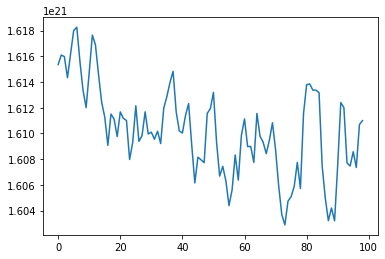

In [6]:
plt.plot(salinity.data.values)

In [7]:
ts = hcm3.SALATS('xosfy')
budget = ts.budget(zone=zones.Box(lon_na_min, lon_na_max, lat_na_min, lat_na_max, z_min = -1000), dimensions=['longitude', 'latitude', 'zb'])
budget

__ Importation of <class 'pylaeoclim_leeds.hadcm3_processing.SALATS'> : xosfy between years 101 and 199.
Time elapsed for open_dataset : 0.00489044189453125
Time elapsed for crop start year : 0.0011889934539794922
Time elapsed for crop start and end years : 0.002396106719970703
Time elapsed for crop start and end years and months : 0.002427816390991211
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Budget sea water salinity (annual).
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.
____ Summing over dimension: longitude
____ Summing over dimension: latitude
____ Summing over dimension: zb


None; None
None; None
None; None
None; None
None; None
None; None
None; None
None; None
None; None
t: [0101-06-01 00:00:00; 0102-06-01 00:00:00; ...; 0198-06-01 00:00:00; 0199-06-01 00:00:00; 99]
DATA: <xarray.DataArray 'salinity_ym_dpth' (t: 99)>
array([1.61536196e+21, 1.61610190e+21, 1.61597937e+21, 1.61433420e+21,
       1.61619947e+21, 1.61801102e+21, 1.61826237e+21, 1.61561894e+21,
       1.61336385e+21, 1.61201041e+21, 1.61475416e+21, 1.61765186e+21,
       1.61690195e+21, 1.61457484e+21, 1.61242850e+21, 1.61127429e+21,
       1.60907191e+21, 1.61150371e+21, 1.61112855e+21, 1.60975553e+21,
       1.61167435e+21, 1.61116961e+21, 1.61100575e+21, 1.60797491e+21,
       1.60929973e+21, 1.61215053e+21, 1.60938722e+21, 1.60981976e+21,
       1.61168014e+21, 1.60995861e+21, 1.61009933e+21, 1.60954914e+21,
       1.61017312e+21, 1.60921196e+21, 1.61197726e+21, 1.61286484e+21,
       1.61397127e+21, 1.61482631e+21, 1.61168199e+21, 1.61019413e+21,
       1.61003537e+21, 1.61139788e+21, 1.6

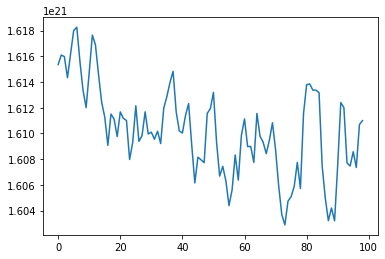

In [8]:
plt.plot(budget.data.values)

In [ ]:
The effect of anthropogenic aerosols on the Aleutian Low